## Import those packages

In [1]:
import geopandas as gpd
from geopandas.tools import sjoin
import matplotlib.pyplot as plt
import pandas as pd

## File location/loading

##### Some info on shapefiles:
-There are lots of ways to load them with python!
-I have so far opted to use geopandas as it plays nice with pandas which I kind of know
-A shapefile will actually consist of several files, you only ever manually load in one file. All the other 
    files will load in automatically (I guess??), but you need to make sure they all have the SAME NAME,
    but with different file endings (i.e., .shp and .prj)
-Each shapefile will have a different crs, which refers to the projection (I think 4326 is 'normal')

In [2]:
census_file='data/WA_census_tracts/tl_2019_53_tract.shp'
ses_file='data/Seattle_ses_data/ses_data.shp'
census_data = gpd.read_file(census_file)
ses_data = gpd.read_file(ses_file)
#Converting it to what I think is the default lat/lon format
new_ses_data=ses_data.to_crs("EPSG:4326")

#### No need to use the census file, I think the ses file will have everything we need

In [3]:
#Let's check out the ses data_file

new_ses_data.head()

,OBJECTID,GEOID10,NAME10,NAMELSAD10,ACRES_TOTA,PCT_PEOPLE,PTL_PEOPLE,PCT_ENGLIS,PTL_ENGLIS,PCT_FOREIG,...,COMPOSIT_1,RACE_ELL_O,RACE_ELL_1,SOCIOECONO,SOCIOECO_1,HEALTH_PER,HEALTH_QUI,Shape__Are,Shape__Len,geometry
0,1,53033005900,59,Census Tract 59,447.919508,0.184537,0.241,0.013041,0.098,0.095335,...,Lowest,0.181,Lowest,0.241,Second lowest,0.264,Second lowest,1.951137e+07,24649.766671,"POLYGON ((-122.37118 47.65770, -122.37101 47.6..."
1,2,53033004700,47,Census Tract 47,490.845743,0.181284,0.211,0.038452,0.444,0.105566,...,Second lowest,0.301,Second lowest,0.437,Middle,0.391,Second lowest,2.138124e+07,22313.994871,"POLYGON ((-122.36617 47.67235, -122.36617 47.6..."
2,3,53033001900,19,Census Tract 19,410.970985,0.301733,0.557,0.079266,0.647,0.191898,...,Second highest,0.617,Second highest,0.579,Middle,0.662,Second highest,1.790190e+07,21117.783503,"POLYGON ((-122.31769 47.70129, -122.31766 47.7..."
3,4,53033001300,13,Census Tract 13,292.551184,0.405455,0.692,0.127567,0.767,0.231492,...,Second highest,0.730,Second highest,0.647,Second highest,0.707,Second highest,1.274353e+07,15034.470142,"POLYGON ((-122.33396 47.70685, -122.33395 47.7..."
4,5,53033004100,41,Census Tract 41,787.830676,0.164442,0.158,0.045527,0.519,0.150340,...,Lowest,0.361,Second lowest,0.053,Lowest,0.076,Lowest,3.431790e+07,35293.161989,"POLYGON ((-122.25158 47.67384, -122.25159 47.6..."


### Now let's get 2 points and find out which census tract it is in

In [4]:
#Come up with 2 random points that are in Seattle and put them in a pandas dataframe
#Note there are likely other ways to do this
test_points = pd.DataFrame({'Names': ['point1', 'point2'], 'Latitude': [47.6, 47.55], 'Longitude': [-122.3, -122.3]})

#Then turn that pandas dataframe into a GeoDataFrame which is some sort of shapefile
#Note I am specifying that this is crs="EPSG:4326", which tells it it's in normal lat/lon
point_gdf = gpd.GeoDataFrame(
    test_points, geometry=gpd.points_from_xy(test_points.Longitude, test_points.Latitude), crs="EPSG:4326")  

#Do the same for our ses_data, taking only the shapefile info, which has the 'geometry' heading
shape_gdf = gpd.GeoDataFrame(new_ses_data['geometry'])

In [5]:
#Then we do this join thing
#Not sure how this work, but it will basically tell us which one of the ses polygons the points are in
#More info here: https://geopandas.org/mergingdata.html
pointInPolys = sjoin(point_gdf, shape_gdf, how='left', op='intersects')


In [6]:
#Now let's print where they overlap
#Basically it will give the index of the census tract that each point falls in
#We could then go back to the SES data with that index to get info if we wanted to
print(pointInPolys)

    Names  Latitude  Longitude                     geometry  index_right
0  point1     47.60     -122.3  POINT (-122.30000 47.60000)           47
1  point2     47.55     -122.3  POINT (-122.30000 47.55000)           44


### And for fun let's plot something!

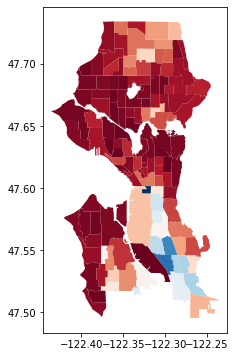

In [7]:

fig, ax = plt.subplots(1, figsize=(10, 6))
test_plot = new_ses_data.plot(column='PCT_ENGLIS', cmap='RdBu',linewidth=0.8, ax=ax)
#cbar=fig.colorbar(test_plot, ax=ax)